In [4]:
import tensorflow as tf

In [5]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [6]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [7]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [9]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4845 - accuracy: 0.8579
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1531 - accuracy: 0.9549
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1083 - accuracy: 0.9677
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0867 - accuracy: 0.9732
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0752 - accuracy: 0.9771
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0655 - accuracy: 0.9782
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0601 - accuracy: 0.9797
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0522 - accuracy: 0.9833
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0435 - accuracy: 0.9850
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.044

In [11]:
model.evaluate(x_test,  y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0697 - accuracy: 0.9801


[0.06970273703336716, 0.9800999760627747]

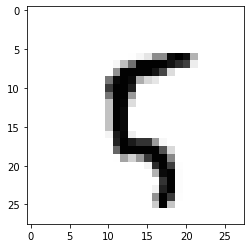

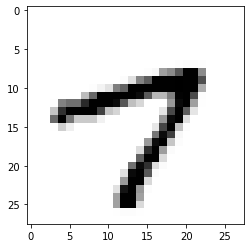

In [12]:
import numpy as np
import matplotlib.pyplot as plt

for i in range(100, 102):
    img = x_train[i].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show()

In [13]:
import pandas as pd
len(x_train)
pred = model.predict_classes(x_test, verbose=2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


313/313 - 0s


In [14]:
len(x_test)

10000

In [15]:
from PIL import Image
from IPython.display import display

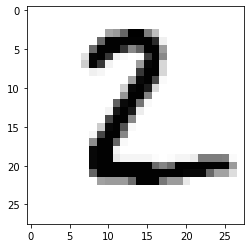

In [16]:
import numpy as np
img=np.resize(x_test[1], (28,28))
plt.imshow(img, cmap="Greys")
plt.show()
im2arr = np.array(img)
im2arr = im2arr.reshape(1,28,28)

In [17]:
y_pred = model.predict(im2arr)
print(y_pred)

[[ -6.987034   -3.8060384  17.106985   -2.3047414 -39.109627   -5.055845
   -3.9932885 -24.112988   -1.9741536 -20.742218 ]]


In [18]:
y_hat =np.argmax(y_pred)
y_hat

2

In [37]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(im2arr)
predictions

accuracy=float(np.max(predictions))
accuracy

0.8797557353973389

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
a = 4
for i in range(0,99) :
  if i == 3 & a == 4 :
    print('wow')
  else :
    print(i)
print("the immage with accuracy less than 0.9 is", i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
the immage with accuracy less than 0.9 is 98


In [41]:
import numpy as np
for i in range (0, (len(x_test)-1)) :
  img=np.resize(x_test[i], (28,28))
  im2arr = np.array(img)
  im2arr = im2arr.reshape(1,28,28)
  probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
  predictions = probability_model.predict(im2arr)
  predictions

  accuracy=float(np.max(predictions))
  if accuracy < 0.9 :
    print(accuracy)
    print("the image with accuracy less than 0.9 is image x_test number", i+1)
    break

0.8797557353973389
the image with accuracy less than 0.9 is image x_test number 63


One of the image that have accuracy less than 0.9
is x_test number 63 with 0.879755735 accuracy (Might be differ)

Sorry it might be inaccurate but if I have to check every single image in x_test, my pc couldn't handle it